# 통계

## 무작위성 검정

A 쇼핑몰은 새로운 브랜드 런칭 이벤트를 지원하기 위하여 매장 방문 고객에게 상품 1만원권을 배포하였다. 매장 오픈 후 최초 20명의 방문이력을 조사한 결과 아래의 순서로 멤버십을 소지한 사람(1)과 소지하지 않은 사람(0)이 방문하였다. A 쇼핑몰의 CRM 팀에서는 이러한 마케팅 행사가 한쪽에 치우치지 않고 공정하게 이루어졌는지를 판단하기 위해 무작위성 검정을 진행하고자 한다. 

**1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0** 

이 문제를 위한 가설을 설정하고 검정하시오.

In [74]:
# H0: 상품권은 최초 20명에게 무작위로 배포되었다.
# H1: 상품권은 최초 20명에게 무작위로 배포되지 않았다.
from collections import Counter
import numpy as np
from scipy.stats import norm

gift = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

###수기 계산
nk = 2 #부호의 개수
n1 = Counter(gift)[1] #1 개수
n2 = Counter(gift)[0] #0 개수
#n1, n2이 충분히 클 때 평균이 avg, 분산이 var인 점근적 정규분포를 따른다
run = 6 #Run의 개수

avg = 2*n1*n2/(n1+n2)+1
var = 2*n1*n2*(2*n1*n2-n1-n2)/((n1+n2)**2)/(n1+n2-1)

#런의 총개수에 따라서 h의 값을 정함
if run < 2*n1*n2/(n1+n2)+0.5:
    h = 0.5
else:
    h = -0.5

#n1, n2의 크기에 따라서 Z통계량 공식을 정함
if n1 <= 20 and n2 <= 20:
    Z = (run-avg+h) / np.sqrt(var) #소표본인 경우
else:
    Z = (run-avg) / np.sqrt(var) #대표본인 경우

print("Z: {:.3f}, p-value: {:.3f}".format(Z, (norm.cdf(Z))*2)) #양측검정 pvalue
print("참고) avg: {:.3f}, var: {:.3f}, std: {:.3f}".format(avg, var, np.sqrt(var))) 
# 검정결과: pvalue가 유의수준 0.05보다 작기 때문에 대립가설을 채택한다.
# 즉, 상품권은 최초 20명에게 무작위로 배포되지 않았다.


###패키지 계산: 왜 pvalue가 다르게 나오는 것일까 ?_?)
from statsmodels.sandbox.stats.runs import runstest_1samp
stat, p = runstest_1samp(gift)
print("패키지 계산의 통계량 {:.3f}, pvalue {:.3f}".format(stat, p))

Z: -1.828, p-value: 0.068
참고) avg: 10.100, var: 3.879, std: 1.970
패키지 계산의 통계량 -1.828, pvalue 0.068


### 　

## 두 변수의 비교

A 쇼핑 마케팅 팀에서는 새로운 로열티 프로그램을 제공하며 멤버십 기능을 강화하였다. 로열티 프로그램 만족도의 변화가 통계적으로 유의한 지 알아보기 위해 도입 전과 후의 고객만족도에 대한 검정을 수행하고자 한다.

**사용데이터 : Ashopping.csv    **
- encoding="CP949" 

이 문제를 위한 가설을 설정하고 검정하시오.

In [56]:
from pandas import read_csv
df = read_csv('Ashopping.csv', encoding='CP949')
before = df['멤버쉽_프로그램_가입전_만족도'].values
after = df['멤버쉽_프로그램_가입후_만족도'].values

# H0: 가입전 만족도와 가입후 만족도는 차이가 없다.
# H1: 가입전 만족도와 가입후 만족도는 차이가 있다.

###패키지 계산
from scipy.stats import ttest_rel, t
stat, p = ttest_rel(before, after)
print("패키지 계산의 통계량 {:.3f}, pvalue {:.3f}".format(stat, p))

###수기 계산
d = before-after
dm = np.mean(d)
n = len(df)
Sd = np.sqrt( sum((d-dm)**2) / (n-1) )
T = dm / (Sd/np.sqrt(n))
print('수기 계산 통계량 {:.3f}, pvalue {:.3f}'.format(T, t.cdf(T, n-1)))

#결론: 가입전 만족도와 가입후 만족도는 차이가 있다.

패키지 계산의 통계량 -29.560, pvalue 0.000
수기 계산 통계량 -29.560, pvalue 0.000


### 　

전자회사 C사는 기존의 물류 알고리즘보다 개선되었다고 알려진 새로운 물류 경로 최적화 알고리즘을 도입해 상품의 배송시간을 단축하고자 한다. 이에 전국 7개의 물류센터에 실험적으로 적용해보고 실제로 얼마나 더 나은 성과를 보이는지 검증해보고자 한다. 전국 7개의 물류센터에서 새로운 알고리즘의 적용 전 평균 배송시간과 적용 후의 평균 배송시간은 다음과 같다. 

|물류센터|기존 알고리즘|신규 알고리즘|
|---|---|---|
|1|10|8|
|2|30|27|
|3|9|16|
|4|21|25|
|5|35|30|
|6|12|13|
|7|17|11|

이 문제를 위한 가설을 설정하고 검정하시오.

In [71]:
# H0: 알고리즘 변경 전후 평균 배송 시간은 차이가 없다.
# H1: 알고리즘 변경 후, 평균 배송 시간이 단축 되었다.

old = [10, 30, 9, 21, 35, 12, 17]
new = [8, 27, 16, 25, 30, 13, 11]

stat, p = ttest_rel(old, new, alternative='greater')
#two-sided인 경우, 해당 통계량의 양측 area의 p-value를 합한 것
print("패키지 계산의 통계량 {:.3f}, pvalue {:.3f}".format(stat, p))
#pvalue가 유의수준 0.05보다 많으므로 귀무가설을 채택한다. 즉, 평균 배송 시간은 차이가 없다.

패키지 계산의 통계량 0.316, pvalue 0.382


### 　

## 세 변수의 비교

A 쇼핑에서는 VIP 고객들을 대상으로 새로운 혜택을 제공하고자 한다. 샘플증정, 포인트 추가, 무료배송, 할인쿠폰 등 4가지 혜택에 대한 5개 지역별 고객들에 대한 사전 선호도 조사를 실시한 결과 지역별 서비스에 대한 서열은 아래 표와 같이 정리되었다. 혜택 별 고객 선호도에 차이가 있는지를 검정을 통해 알아보자. 

|지역|샘플증정|포인트추가|무료배송|할인쿠폰|
|---|---|---|---|---|
|서울경기|1|3|2|4|
|강원|2|3|4|1|
|충청|1|3|4|2|
|경상|1|2|4|3|
|전라|2|1|3|4|

이 문제를 위한 가설을 설정하고 검정하시오.

In [114]:
# H0: 지역 별 고객 선호도 차이가 없다.
# H1: 지역 별 고객 선호도 차이가 있다.

from scipy.stats import chi2_contingency
from pandas import DataFrame
table = DataFrame({"샘플증정":[1,2,1,1,2], '포인트추가':[3,3,3,2,1], '무료배송':[2,4,4,4,3], '할인쿠폰':[4,1,2,3,4]}, index=['서울경기', '강원', '충청', '경상', '전라'])
print(table, '\n')

stat, p, df, exp_mat = chi2_contingency(table)
print("통계량 {:.3f}, pvalue {:.3f}".format(stat, p))
# 고객별 선호도 차이가 없다!

      샘플증정  포인트추가  무료배송  할인쿠폰
서울경기     1      3     2     4
강원       2      3     4     1
충청       1      3     4     2
경상       1      2     4     3
전라       2      1     3     4 

통계량 5.560, pvalue 0.937


### 　

공장 종류(A,B,C,D)에 따라서 공장 설비(높이, 캐노피 면적)에 차이가 발생하는 지 알아보자.

In [84]:
#해당 코드를 실행하면 데이터가 로드됩니다. 
df=read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
df.head(3)

,plant_var,height,canopy_vol
0,A,20.0,0.70
1,A,22.0,0.80
2,A,24.0,0.95


In [97]:
df['plant_var'].value_counts() #균형자료

D    10
C    10
B    10
A    10
Name: plant_var, dtype: int64

이 문제를 위한 가설을 설정하고 검정하시오.

             df    sum_sq     mean_sq           F        PR(>F)
plant_var   3.0  1553.402  517.800667  116.684552  1.326405e-18
Residual   36.0   159.754    4.437611         NaN           NaN 


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B    -2.36 0.0762  -4.8973   0.1773  False
     A      C   -15.85  0.001 -18.3873 -13.3127   True
     A      D    -9.55  0.001 -12.0873  -7.0127   True
     B      C   -13.49  0.001 -16.0273 -10.9527   True
     B      D    -7.19  0.001  -9.7273  -4.6527   True
     C      D      6.3  0.001   3.7627   8.8373   True
------------------------------------------------------


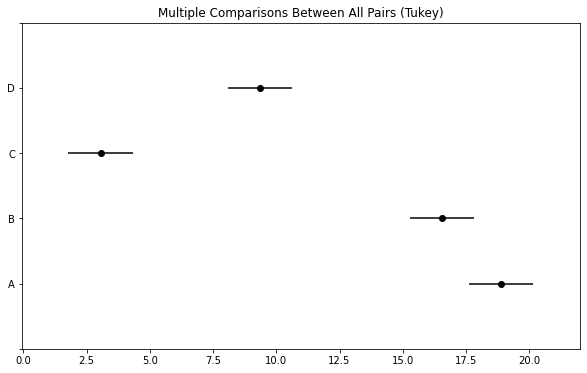

In [108]:
#H0: 공장종류에 따라 높이에 차이가 없다.
#H1: 공장종류에 따라 높이에 차이가 있다.
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('height ~ plant_var', data=df).fit()
print(anova_lm(model, test='F', typ=1), "\n\n")
#F검정 통계량의 pvalue가 0.05보다 낮기 때문에 대립가설을 채택한다.

#사후검정
from statsmodels.sandbox.stats.multicomp import MultiComparison
HSD = MultiComparison(data=df['height'], groups = df['plant_var']).tukeyhsd(0.05)
print(HSD)

from matplotlib import pyplot as plt
HSD.plot_simultaneous()
plt.show()

             df   sum_sq   mean_sq          F        PR(>F)
plant_var   3.0  1.40219  0.467397  34.909295  9.360446e-11
Residual   36.0  0.48200  0.013389        NaN           NaN 


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   -0.176 0.0086 -0.3154 -0.0366   True
     A      C   -0.512  0.001 -0.6514 -0.3726   True
     A      D    -0.31  0.001 -0.4494 -0.1706   True
     B      C   -0.336  0.001 -0.4754 -0.1966   True
     B      D   -0.134 0.0633 -0.2734  0.0054  False
     C      D    0.202 0.0022  0.0626  0.3414   True
----------------------------------------------------


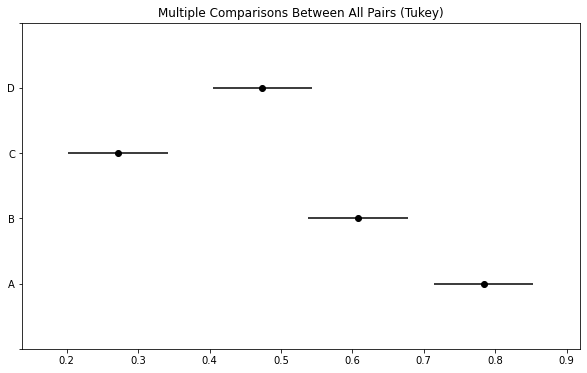

In [109]:
#H0: 공장종류에 따라 캐노피 면적에 차이가 없다.
#H1: 공장종류에 따라 캐노피 면적에 차이가 있다.
model = ols('canopy_vol ~ plant_var', data=df).fit()
print(anova_lm(model, test='F', typ=1), "\n\n")
#F검정 통계량의 pvalue가 0.05보다 낮기 때문에 대립가설을 채택한다.

#사후검정
from statsmodels.sandbox.stats.multicomp import MultiComparison
HSD = MultiComparison(data=df['canopy_vol'], groups = df['plant_var']).tukeyhsd(0.05)
print(HSD)

from matplotlib import pyplot as plt
HSD.plot_simultaneous()
plt.show()

# 기계학습

사용 데이터 : creditcard.csv  
데이터 출처 : 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

제시된 데이터는 심한 불균형 형태를 띠고 있다.  

해당사항을 고려하여  

**1) 전처리하고  
2) 모델을 구현하고  
3) 적절한 평가지표를 선정하여 점수를 구하라**


|Target|Count|Percent|
|---|---|---|
|0|284315|99.83|
|1|492|0.17|


In [115]:
cc = read_csv('creditcard.csv')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [142]:
# 데이터 수를 고려하여 undersampling 진행
from pandas import concat

SCs = []
for i in range(5): #5개의 undersampling set를 생성
    sample0 = cc.query("Class == 0").sample(300)
    sample1 = cc.query("Class == 1").sample(300)
    sc = concat([sample0, sample1])
    SCs.append(sc)
print(len(SCs), SCs[0].shape)

5 (600, 31)


In [144]:
sc = SCs[0]
sc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,61228.911667,-3.211667,2.287217,-3.887127,2.565074,-2.285618,-0.633819,-3.645824,0.317618,-1.466242,...,0.283207,0.011064,-0.036713,-0.036886,0.092399,0.041186,0.060793,-0.001151,97.807200,0.500000
std,30811.074272,6.344284,4.110041,7.220728,3.289873,4.747030,1.916564,6.818835,5.931190,2.558040,...,3.365561,1.307505,1.384784,0.572614,0.694618,0.463089,1.172455,0.560695,223.201823,0.500417
min,162.000000,-30.552380,-7.325641,-31.103685,-4.452088,-22.105532,-5.430971,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-1.753526,-4.781606,-1.123534,-7.263482,-8.338123,0.000000,0.000000
25%,40399.750000,-3.744888,-0.021620,-5.450497,0.143174,-2.665071,-1.551056,-4.488278,-0.136878,-2.476500,...,-0.176112,-0.521657,-0.260551,-0.403592,-0.224258,-0.283741,-0.074970,-0.082134,1.290000,0.000000
50%,59116.500000,-1.112840,1.103120,-0.938439,1.499399,-0.665909,-0.592460,-0.764781,0.206251,-0.750324,...,0.129824,0.049260,-0.060258,0.039726,0.124755,-0.029062,0.038643,0.029379,19.315000,0.500000
75%,84204.000000,0.949667,3.377868,0.592183,4.467879,0.204940,0.152432,0.211094,0.986922,0.115938,...,0.736910,0.491651,0.154753,0.399628,0.450965,0.347036,0.456945,0.203366,99.990000,1.000000
max,125200.000000,2.315873,22.057729,3.554865,12.114672,11.095089,8.933762,9.179305,20.007208,4.068265,...,27.202839,8.361985,5.842218,1.210968,2.208209,1.204351,4.379080,1.779364,2528.610000,1.000000


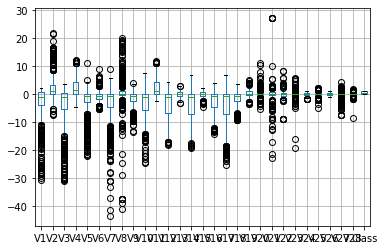

In [145]:
#scale이 비슷한 Vn feature들로만 이상치 확인
sc.drop(['Time', 'Amount'], axis=1).boxplot()
plt.show()

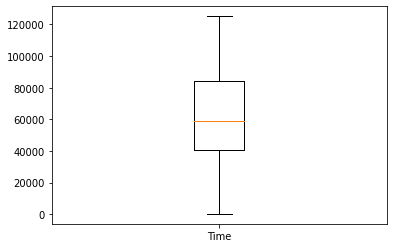

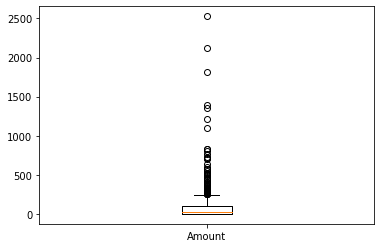

In [146]:
#Amount에서 이상치 확인
plt.boxplot(sc['Time'])
plt.xticks([1], ['Time'])
plt.show()

plt.boxplot(sc['Amount'])
plt.xticks([1], ['Amount'])
plt.show()

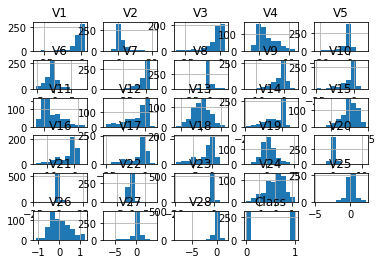

In [147]:
sc.drop(['Time', 'Amount'], axis=1).hist()
plt.show()

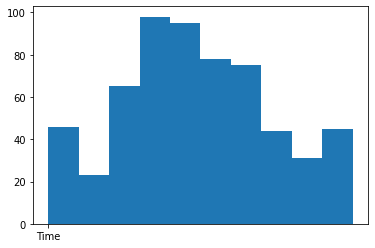

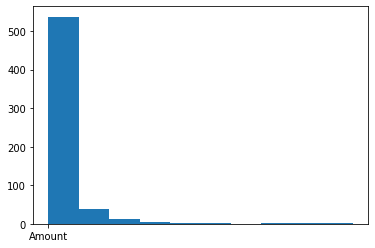

In [148]:
plt.hist(sc['Time'])
plt.xticks([1], ['Time'])
plt.show()

plt.hist(sc['Amount'])
plt.xticks([1], ['Amount'])
plt.show()

In [152]:
#첫번째 sc set으로 fitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sc.drop('Class', axis=1), sc['Class'])

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)
print("Train score: {:.3f}, Test score:{:.3f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train score: 1.000, Test score:0.960


In [155]:
#첫번째 sc set으로 fitting한 분류기로 나머지 sc 데이터셋들의 스코어 확인
for i, data in enumerate(SCs):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'])
    print("{}번째 SC set:".format(i))
    print("Train score: {:.3f}, Test score:{:.3f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

0번째 SC set:
Train score: 0.976, Test score:0.967
1번째 SC set:
Train score: 0.973, Test score:0.980
2번째 SC set:
Train score: 0.969, Test score:0.987
3번째 SC set:
Train score: 0.967, Test score:0.993
4번째 SC set:
Train score: 0.993, Test score:0.980


In [161]:
#원본세트로 스코어링
cc = cc.dropna() # 결측치 삭제
print("해당 분류기로 원본 데이터를 분류했을 때의 정확도가 %.3f으로 상당히 잘 적합되었다고 볼 수 있다." %(rf.score(cc.drop('Class', axis=1), cc['Class'])))

해당 분류기로 원본 데이터를 분류했을 때의 정확도가 0.967으로 상당히 잘 적합되었다고 볼 수 있다.
